[Previous: Class 8](https://nbviewer.jupyter.org/github/NBwr/DataScienceViewer/blob/master/Lessons/class8-AdvRegrClassif.ipynb) | [Home](https://nbviewer.jupyter.org/github/NBwr/DataScienceViewer/blob/master/Lessons/home.ipynb) | [Next: Class 10](https://nbviewer.jupyter.org/github/NBwr/DataScienceViewer/blob/master/Lessons/class10-Trees.ipynb)  

# Class 9


- [9.1 L1/2 Regression](#9.1-L1/2-Regression)
    - [9.1.1 GridSearchCV](#9.1.1-GridSearchCV)
    - [9.1.2 Manual grid search](#9.1.2-Manual-grid-search)
    - [9.1.3 RidgeCV](#9.1.3-RidgeCV)
    - [9.1.4 lasso path](#9.1.4-lasso-path)
    - [9.1.5 Elastic Net](#9.1.5-Elastic-Net)
- [9.2 kaggle Housing Data](#9.2-kaggle-Housing-Data)
    - [9.2.1 EDA](#9.2.1-EDA)
    - [9.2.2 Missing Values](#9.2.2-Missing-Values)
    - [9.2.3 Your first submission](#9.2.3-Your-first-submission)
    - [9.2.4 Optimizing the Model](#9.2.4-Optimizing-the-Model)


#### First Some Theory

* Curse of dimensionality
* Bias Variance Tradeoff


#### Comments

1. The mysterious "penalty" in LogisticRegression from lesson 6 is now resolved
2. Try n<p with and without regularization
3. Compare Ridge() with LinearRegression()
4. Read about the **one-standard-error rule** in chap 6.1 of the ISLR book!


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV


%precision 3

'%.3f'

In [3]:
boston = pd.read_csv('../data/boston.csv')
#print(boston.head())
X = scale(boston.drop('medv', axis=1).values)
y = boston['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
##SOLUTION

#2. Try n<p with and without regularization
lr = skl_lm.LinearRegression().fit(X_train[0:9,:], y_train[0:9])
print(lr.coef_)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train[0:9,:], y_train[0:9])
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

[-2.315e+00  2.998e-15 -4.101e+00 -1.776e-15  3.519e-01  6.484e+00
  9.880e-02 -1.496e+00  5.116e+00 -4.274e+00  2.539e+00 -1.706e+00
  1.544e+00]


-12.726842260533155

In [5]:
#np.logspace(-4, 0, 50)

np.linspace(0, 1, 10)
np.logspace(-2, 0, 10)

array([0.01 , 0.017, 0.028, 0.046, 0.077, 0.129, 0.215, 0.359, 0.599,
       1.   ])

##### 9.1.1 GridSearchCV

In [6]:

n_folds=10
# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}

# Instantiate a Ridge regression object: ridge
ridge = Ridge(normalize=True)

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=n_folds)

# Fit it to the data
ridge_cv.fit(X, y)



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.000e-04, 1.207e-04, 1.456e-04, 1.758e-04, 2.121e-04, 2.560e-04,
       3.089e-04, 3.728e-04, 4.498e-04, 5.429e-04, 6.551e-04, 7.906e-04,...
       2.947e-03, 3.556e-03, 4.292e-03, 5.179e-03, 6.251e-03, 7.543e-03,
       9.103e-03, 1.099e-02, 1.326e-02, 1.600e-02, 1.931e-02, 2.330e-02,
       2.812e-02, 3.393e-02, 4.095e-02, 4.942e-02, 5.964e-02, 7.197e-02,
       8.685e-02, 1.048e-01, 1.265e-01, 1.526e-01, 1.842e-01, 2.223e-01,
       2.683e-01, 3.237e-01, 3.907e-01, 4.715e-01, 5.690e-01, 6.866e-01,
       8.286e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Ridge Regression Parameters: {'alpha': 0.2682695795279725}
Best score is 0.3675081748471478


(0.0001, 1.0)

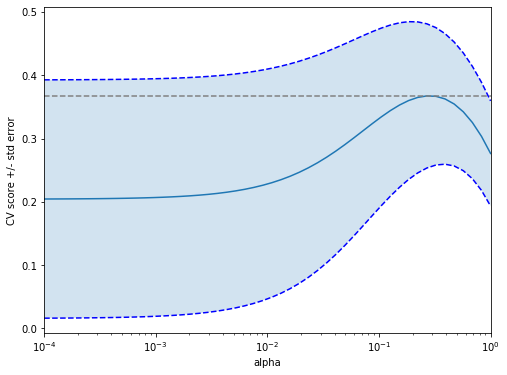

In [8]:
#plot:
scores = ridge_cv.cv_results_['mean_test_score']
scores_std = ridge_cv.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alpha_space, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alpha_space, scores + std_error, 'b--')
plt.semilogx(alpha_space, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alpha_space, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alpha_space[0], alpha_space[-1]])

##### 9.1.2 Manual grid search

In [9]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

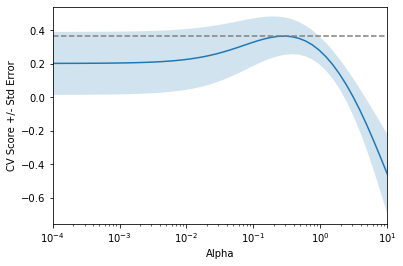

In [10]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 1, 50)
ridge_scores = []
ridge_scores_std = []

from sklearn.model_selection import cross_val_score

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=n_folds)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)



In [11]:
alpha_space[np.argmax(ridge_scores)]

0.29470517025518095

#### 9.1.3-RidgeCV

In [12]:
#Compute the regularization path using RidgeCV

ridgecv = RidgeCV(alphas=alpha_space, fit_intercept= False, cv = n_folds)#, 
                  #scoring='mean_squared_error1'
ridgecv.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.000e-04, 1.265e-04, 1.600e-04, 2.024e-04, 2.560e-04, 3.237e-04,
       4.095e-04, 5.179e-04, 6.551e-04, 8.286e-04, 1.048e-03, 1.326e-03,
       1.677e-03, 2.121e-03, 2.683e-03, 3.393e-03, 4.292e-03, 5.429e-03,
       6.866e-03, 8.685e-03, 1.099e-02, 1.389e-02, 1.758e-02, 2.223e-02,
       2.812e-02, 3.556e-02, 4.498e-02, 5.690e-02, 7.197e-02, 9.103e-02,
       1.151e-01, 1.456e-01, 1.842e-01, 2.330e-01, 2.947e-01, 3.728e-01,
       4.715e-01, 5.964e-01, 7.543e-01, 9.541e-01, 1.207e+00, 1.526e+00,
       1.931e+00, 2.442e+00, 3.089e+00, 3.907e+00, 4.942e+00, 6.251e+00,
       7.906e+00, 1.000e+01]),
        cv=10, fit_intercept=False, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [13]:
## arrg, unable to get this to work:
ridgecv.alpha_

10.0

In [14]:
ridge2 = Ridge()
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X), y)
#mean_squared_error(y_test, ridge2.predict(scale(X_test)))

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### 9.1.4 lasso path


In [15]:
from sklearn.linear_model import lasso_path, enet_path

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)



Computing regularization path using the lasso...
Computing regularization path using the elastic net...


(-1.0478863849541158,
 1.5898476245851256,
 -4.063764386618421,
 3.3351181022877876)

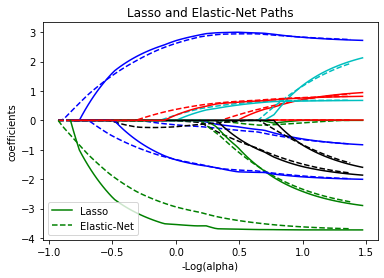

In [16]:
# Display results
from itertools import cycle #https://docs.python.org/2/library/itertools.html

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')

#### 9.1.5 Elastic Net

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

"The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. We optimize:" 

1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

* Note the default *alpha* and *l1_ratio*
* If we cross validate, which parameter should we optimize over?


In [17]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en1 = ElasticNet(random_state=0)
en1.fit(X, y)
print(en1.coef_) 

[-0.341  0.079 -0.263  0.403 -0.24   2.361 -0.    -0.    -0.    -0.312
 -1.268  0.462 -2.337]


In [18]:
en0 = ElasticNet(random_state=0, l1_ratio = 1)
en0.fit(X, y)
print(en0.coef_) 

[-0.     0.    -0.     0.    -0.     2.713 -0.    -0.    -0.    -0.
 -1.344  0.181 -3.543]


In [19]:
# cross validation
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV



In [20]:
regr = ElasticNetCV(cv=10, random_state=0)
regr.fit(X, y)

print(regr.alpha_)

print(regr.coef_)

0.19214297852997764
[-0.554  0.524 -0.26   0.683 -1.03   2.863 -0.    -1.721  0.528 -0.427
 -1.726  0.741 -3.301]


### 9.2 kaggle Housing Data

####  9.2.1 EDA

This [notebook](../data/kaggle/HousePrices/EDA.ipynb) (despite its annoying "humor") is a good start. 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


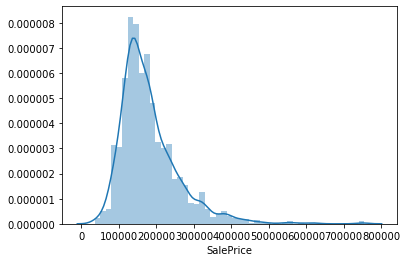

In [21]:
df_train = pd.read_csv('../data/kaggle/HousePrices/train.csv', index_col='Id')
df_test = pd.read_csv('../data/kaggle/HousePrices/test.csv', index_col='Id')

sns.distplot(df_train['SalePrice']);
df_train.head()

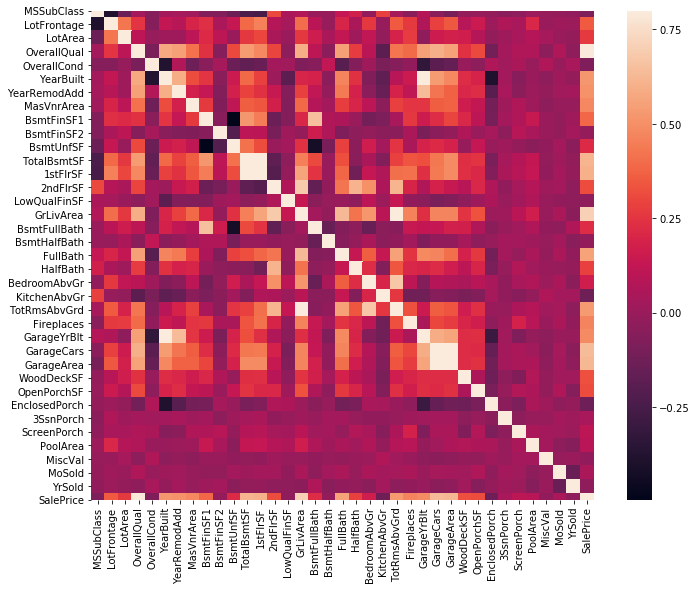

In [22]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

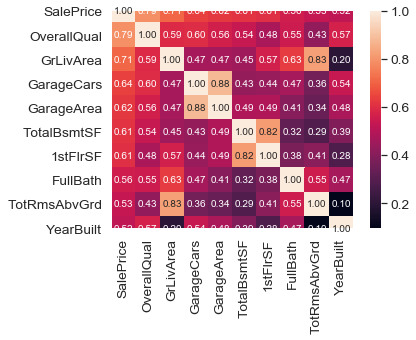

In [23]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

####  9.2.1.1 Dummy Variables

In [24]:
# convert int values to str for specific features
for categ in ['MSSubClass', 'OverallQual', 'OverallCond']:
    df_train[categ] = df_train[categ].astype(str)
    df_test[categ] = df_test[categ].astype(str)

In [25]:
#lots of categorical variables !

d = df_train.dtypes.groupby(df_train.dtypes).groups
category = d[np.dtype('O')].tolist() # + ['MSSubClass', 'OverallQual', 'OverallCond']
category


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
### Let us first take the dummies out:
trainNoDummies = df_train.drop(category, axis=1)
trainNoDummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [27]:
#df_train = pd.get_dummies(df_train)

#df_train.head()

####  9.2.2 Missing Values

In [28]:
# show features with count of NaN values
s = df_train.isnull().sum() + df_test.isnull().sum()
s = s.sort_values(ascending=False)
s = s[s > 0]
s

PoolQC          2909.0
MiscFeature     2814.0
Alley           2721.0
Fence           2348.0
FireplaceQu     1420.0
LotFrontage      486.0
GarageFinish     159.0
GarageQual       159.0
GarageYrBlt      159.0
GarageCond       159.0
GarageType       157.0
BsmtCond          82.0
BsmtExposure      82.0
BsmtQual          81.0
BsmtFinType2      80.0
BsmtFinType1      79.0
MasVnrType        24.0
MasVnrArea        23.0
MSZoning           4.0
BsmtHalfBath       2.0
Utilities          2.0
Functional         2.0
BsmtFullBath       2.0
Electrical         1.0
Exterior2nd        1.0
KitchenQual        1.0
GarageCars         1.0
Exterior1st        1.0
GarageArea         1.0
TotalBsmtSF        1.0
BsmtUnfSF          1.0
BsmtFinSF2         1.0
BsmtFinSF1         1.0
SaleType           1.0
dtype: float64

In [29]:
# unique names for features with NaN values
for i in s.index:
    print(i, df_train[i].unique().tolist()[:10])

PoolQC [nan, 'Ex', 'Fa', 'Gd']
MiscFeature [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
Alley [nan, 'Grvl', 'Pave']
Fence [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
FireplaceQu [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
LotFrontage [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0]
GarageFinish ['RFn', 'Unf', 'Fin', nan]
GarageQual ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
GarageYrBlt [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0, 1931.0, 1939.0]
GarageCond ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
GarageType ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
BsmtCond ['TA', 'Gd', nan, 'Fa', 'Po']
BsmtExposure ['No', 'Gd', 'Mn', 'Av', nan]
BsmtQual ['Gd', 'TA', 'Ex', nan, 'Fa']
BsmtFinType2 ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
BsmtFinType1 ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
MasVnrType ['BrkFace', 'None', 'Stone', 'BrkCmn', nan]
MasVnrArea [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0]
MSZoning ['RL', 'RM', 'C (all)', 'FV', '

##### Tasks

1. Read through the srategies deployed to deal with missing values in the [notebook](../data/kaggle/HousePrices/EDA.ipynb)
2. Think of alternatives. In particular, look up the help file for the *pd.fillna()* function and apply it to the data
3. Might you want to distinguish between categorical and numerical data ?

In [30]:
def FillMissingValues(df_train):

    for feature in ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BsmtFullBath',
                    'BsmtFinSF1', 'GarageArea', 'BsmtFinSF2', 'TotalBsmtSF',
                    'BsmtUnfSF', 'BsmtHalfBath', 'GarageCars']:
        df_train[feature] = df_train[feature].fillna(df_train[feature].mean())
        #df_test[feature] = df_test[feature].fillna(df_test[feature].mean())

    for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual',
                    'BsmtFinType2','BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                    'Electrical', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual',
                    'SaleType', 'Exterior1st', 'Exterior2nd'
                   ]:
        df_train[feature] = df_train[feature].fillna('NaN')
        #df_test[feature] = df_test[feature].fillna('NaN')

    for feature in ['MasVnrType']:
        df_train[feature] = df_train[feature].fillna('None')
        #df_test[feature] = df_test[feature].fillna('None')
        
    return df_train


In [31]:
whole_data = pd.concat([df_train.drop('SalePrice', axis=1).iloc[0:-1], df_test], axis=0)

whole_data = FillMissingValues(whole_data)

# show features with count of NaN values
s = whole_data.isnull().sum() 
s = s.sort_values(ascending=False)
s = s[s > 0]
s


Series([], dtype: int64)

In [32]:
whole_dataNoDummies = whole_data.drop(category, axis=1)
whole_dataNoDummies.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,836.0,192,84,0,0,0,0,0,12,2008


In [33]:
#scale the entire data set:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(whole_dataNoDummies))
print(scaler.mean_)
whole_dataNoDummies_scaled = scaler.transform(whole_dataNoDummies)

whole_dataNoDummies = pd.DataFrame(whole_dataNoDummies_scaled, columns=whole_dataNoDummies.columns)

#whole_dataNoDummies= scale(whole_dataNoDummies)
whole_dataNoDummies.head()

StandardScaler(copy=True, with_mean=True, with_std=True)
[6.930e+01 1.017e+04 1.971e+03 1.984e+03 1.022e+02 4.413e+02 4.950e+01
 5.609e+02 1.052e+03 1.160e+03 3.366e+02 4.696e+00 1.501e+03 4.297e-01
 6.139e-02 1.568e+00 3.801e-01 2.860e+00 1.045e+00 6.452e+00 5.973e-01
 1.978e+03 1.767e+00 4.729e+02 9.349e+01 4.748e+01 2.311e+01 2.603e+00
 1.607e+01 2.253e+00 5.084e+01 6.213e+00 2.008e+03]


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.201926,-0.217851,1.046015,0.896494,0.524944,0.581172,-0.292694,-0.935184,-0.444109,-0.773652,...,0.348576,-0.742179,0.200079,-0.359670,-0.103348,-0.285988,-0.063161,-0.089607,-1.551946,0.157673
1,0.501901,-0.072042,0.154667,-0.395910,-0.572382,1.178350,-0.292694,-0.630221,0.477206,0.261117,...,-0.060104,1.623529,-0.702629,-0.359670,-0.103348,-0.285988,-0.063161,-0.089607,-0.446876,-0.602807
2,-0.061160,0.137163,0.979989,0.848627,0.334591,0.098161,-0.292694,-0.288845,-0.298877,-0.610536,...,0.627222,-0.742179,-0.081093,-0.359670,-0.103348,-0.285988,-0.063161,-0.089607,1.026552,0.157673
3,-0.436534,-0.078381,-1.859118,-0.683111,-0.572382,-0.494626,-0.292694,-0.047605,-0.671034,-0.506040,...,0.785122,-0.742179,-0.184682,3.874266,-0.103348,-0.285988,-0.063161,-0.089607,-1.551946,-1.363287
4,0.689587,0.518804,0.946976,0.752894,1.387128,0.469201,-0.292694,-0.161397,0.211704,-0.037080,...,1.686077,0.782036,0.540444,-0.359670,-0.103348,-0.285988,-0.063161,-0.089607,2.131622,0.157673


In [34]:
whole_data_scaled = pd.concat([whole_dataNoDummies, pd.get_dummies(whole_data[category])], axis=1)

whole_data_scaled.head()


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_NaN,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.201926,-0.217851,1.046015,0.896494,0.524944,0.581172,-0.292694,-0.935184,-0.444109,-0.773652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.501901,-0.072042,0.154667,-0.395910,-0.572382,1.178350,-0.292694,-0.630221,0.477206,0.261117,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.061160,0.137163,0.979989,0.848627,0.334591,0.098161,-0.292694,-0.288845,-0.298877,-0.610536,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.436534,-0.078381,-1.859118,-0.683111,-0.572382,-0.494626,-0.292694,-0.047605,-0.671034,-0.506040,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.689587,0.518804,0.946976,0.752894,1.387128,0.469201,-0.292694,-0.161397,0.211704,-0.037080,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#split the data back into train and test!
print(df_train.shape) #1460
X_train = whole_data_scaled.iloc[0:1460,:]
print(X_train.shape)
#train.head()
print(df_test.shape) 
X_test = whole_data_scaled.iloc[1461:,:]
print(X_test.shape)
#df_train.iloc[1455:1460,:]
y_train = np.log(df_train['SalePrice'].values)

(1460, 80)
(1460, 342)
(1459, 79)
(1459, 342)



#### 9.2.3 Your first submission

Fit a model with the predictors of your choice and submit to kaggle!

In [ ]:
X = df_train.copy()

X = X.drop(category + ["SalePrice"], axis=1)
#X = X.drop("SalePrice", axis=1)
y = df_train.SalePrice


In [ ]:
n_folds=10
# Setup the hyperparameter grid
alpha_space = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_space}

# Instantiate a Ridge regression object: ridge
ridge = Ridge(normalize=True)

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=n_folds)

# Fit it to the data
ridge_cv.fit(scale(X), y)


In [ ]:
#plot:
scores = ridge_cv.cv_results_['mean_test_score']
scores_std = ridge_cv.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alpha_space, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alpha_space, scores + std_error, 'b--')
plt.semilogx(alpha_space, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alpha_space, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alpha_space[0], alpha_space[-1]])

In [ ]:
print(ridge_cv.best_params_)
ridge2 = Ridge()
ridge2.set_params(alpha=ridge_cv.best_params_["alpha"])
ridge2.fit(scale(X), y)



In [ ]:
y_pred = ridge2.predict(scale(X_test))

In [ ]:
# create submission with current model

pred_df = pd.DataFrame(y_pred, index=test.index, columns=["SalePrice"])
pred_df.to_csv('submission.csv', header=True, index_label='Id')

#### 9.2.4 Optimizing the Model

* Take Log of SalePrice
* add dummies back
* use ridge or lasso or enet to find the best CV predictions!
* think of interaction terms

[top](#)